<a href="https://colab.research.google.com/github/handetushar/Airline-Passenger-Referral-Prediction/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Passenger Referral Prediction**

## **Problem Statement**
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. 
The main objective is to predict whether passengers will refer the airline to their friends.

## **Data Description**
Feature descriptions briefly as follows:<br>
airline: Name of the airline.<br>
overall: Overall point is given to the trip between 1 to 10.<br>
author: Author of the trip<br>
reviewdate: Date of the Review customer review: Review of the customers in free text format<br>
aircraft: Type of the aircraft<br>
travellertype: Type of traveler (e.g. business, leisure)<br>
cabin: Cabin at the flight date flown: Flight date<br>
seatcomfort: Rated between 1-5<br>
cabin service: Rated between 1-5<br>
foodbev: Rated between 1-5 entertainment: Rated between 1-5<br>
groundservice: Rated between 1-5<br>
valueformoney: Rated between 1-5<br>
recommended: Binary, target variable.

## Importing dependencies

In [16]:
# Importing liabraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [51]:
import re
import nltk

In [52]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stop_words=stopwords.words('english')

## Importing the dataframe.

In [2]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML Classification/data_airline_reviews.xlsx')

In [3]:
# display first five rows
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the shape of the dataset
df.shape

(131895, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [6]:
# Checking the % of Null values and duplicate values if any
print(df.isnull().sum()/len(df)*100)

airline            50.000379
overall            51.463664
author             50.000379
review_date        50.000379
customer_review    50.000379
aircraft           85.050229
traveller_type     69.858600
cabin              52.005004
route              69.880587
date_flown         69.951097
seat_comfort       53.992949
cabin_service      53.967171
food_bev           60.113727
entertainment      66.493802
ground_service     70.159597
value_for_money    51.495508
recommended        51.142955
dtype: float64


In [7]:
# Drooping Null values if the complete row is empty
df.dropna(axis=0, how='all', inplace=True)

In [8]:
# size of the dataset after dropping the null rows
df.shape

(65947, 17)

In [9]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [28]:
#Check duplicates
df.duplicated().sum()

4764

In [29]:
df.drop_duplicates(inplace= True)

In [30]:
df.duplicated().sum()

0

In [31]:
# % after dropping the null values and duplicates
print(df.isnull().sum()/len(df)*100)

airline             0.000000
overall             2.912574
author              0.000000
review_date         0.000000
customer_review     0.000000
aircraft           69.782456
traveller_type     38.643087
cabin               4.050145
route              38.687217
date_flown         38.816338
seat_comfort        8.126440
cabin_service       8.079042
food_bev           20.989491
entertainment      34.246441
ground_service     39.249465
value_for_money     3.033522
recommended         2.324175
dtype: float64


In [32]:
df.shape

(61183, 17)

In [36]:
df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

Text(0, 0.5, 'Count')

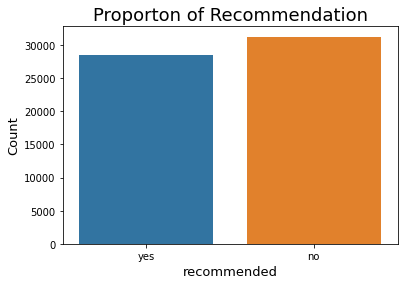

In [39]:
ax=sns.countplot(df['recommended'])
ax.set_title('Proporton of Recommendation', fontsize=18)
ax.set_xlabel("recommended",fontsize=13)
ax.set_ylabel("Count",fontsize=13)

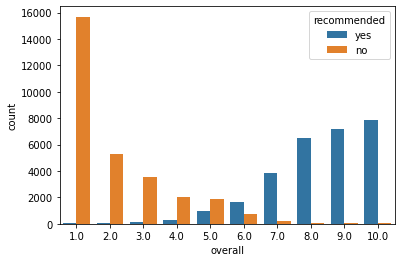

In [33]:
sns.countplot(df['overall'], hue=df['recommended']);

In [20]:
df[['overall', 'recommended']].isnull().sum()

overall        1930
recommended    1507
dtype: int64

In [25]:
df['airline'].value_counts()

Spirit Airlines           2934
American Airlines         2867
United Airlines           2829
British Airways           2811
Cathay Pacific Airways    2402
                          ... 
QantasLink                 105
Adria Airways               85
Air Arabia                  80
Tunisair                    71
Thai Smile Airways          48
Name: airline, Length: 81, dtype: int64

## Remove Stopwards

In [54]:
## Function to remove stopwords

def remove_punc(text):
  ''' function to remove punctuation'''

  import string

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [55]:
df['customer_review'] = df['customer_review'].apply(remove_punc)

In [62]:
df['customer_review'].head()

1    âœ… Trip Verified  London to Izmir via Istanbu...
3    âœ… Trip Verified  Istanbul to Bucharest We ma...
5    âœ… Trip Verified  Rome to Prishtina via Istan...
7    âœ… Trip Verified  Flew on Turkish Airlines IA...
9    âœ… Trip Verified  Mumbai to Dublin via Istanb...
Name: customer_review, dtype: object

In [64]:
stop_word=stopwords.words('english')

In [65]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stop_word]

  # joining the list of words with space separator 
  return " ".join(text)

In [66]:
df['customer_review'] = df['customer_review'].apply(remove_stopwords)

In [67]:
df['customer_review'].head()

1    âœ… trip verified london izmir via istanbul fi...
3    âœ… trip verified istanbul bucharest make chec...
5    âœ… trip verified rome prishtina via istanbul ...
7    âœ… trip verified flew turkish airlines iadist...
9    âœ… trip verified mumbai dublin via istanbul n...
Name: customer_review, dtype: object